In [1]:
import pandas as pd
import geopandas as gpd
import geoplot as gplt
import matplotlib.pyplot as plt
import fiona
from shapely.geometry import Point, LineString, Polygon
import rtree # Import retree package to upports geospatial join
import shapefile as sf

In [2]:
bedrocks = gpd.read_file('data_files/bedrocks.shp')

In [3]:
print(bedrocks.head())

   MSLINK_0   LEX  ROCK                                       LEXICONDES  \
0      3678  SHRD  RHYD                          SHANE'S HILL RHYODACITE   
1      3678  SHRD  RHYD                          SHANE'S HILL RHYODACITE   
2      3659   UIG  RHYO            UNNAMED IGNEOUS INTRUSION, PALAEOGENE   
3      3663   TPR  RHYO  TEMPLEPATRICK RHYOLITE [OBSOLETE NAME AND CODE]   
4      3659   UIG  RHYO            UNNAMED IGNEOUS INTRUSION, PALAEOGENE   

                      ROCKDESC AGE  BGSREF        BGSTYPE   LEX_ROCK  \
0  RHYODACITE             1BAB  GP     703  250k_NI_SOLID  SHRD-RHYD   
1  RHYODACITE             1BAB  GP     703  250k_NI_SOLID  SHRD-RHYD   
2  RHYOLITE               1BAA   G     703  250k_NI_SOLID   UIG-RHYO   
3  RHYOLITE               1BAA  GP     703  250k_NI_SOLID   TPR-RHYO   
4  RHYOLITE               1BAA   G     703  250k_NI_SOLID   UIG-RHYO   

  MAJOR_ROCK             DERMOT  \
0       None  5. ACID VOLCANICS   
1       None  5. ACID VOLCANICS   
2    

<AxesSubplot:>

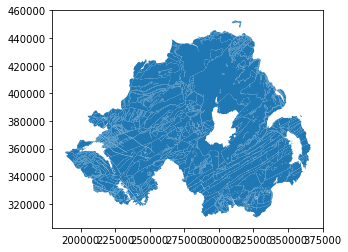

In [4]:
bedrocks.plot()

C:\Users\asuwa\anaconda3\envs\RadonNI\lib\site-packages\geopandas\plotting.py:634: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  warnings.warn(


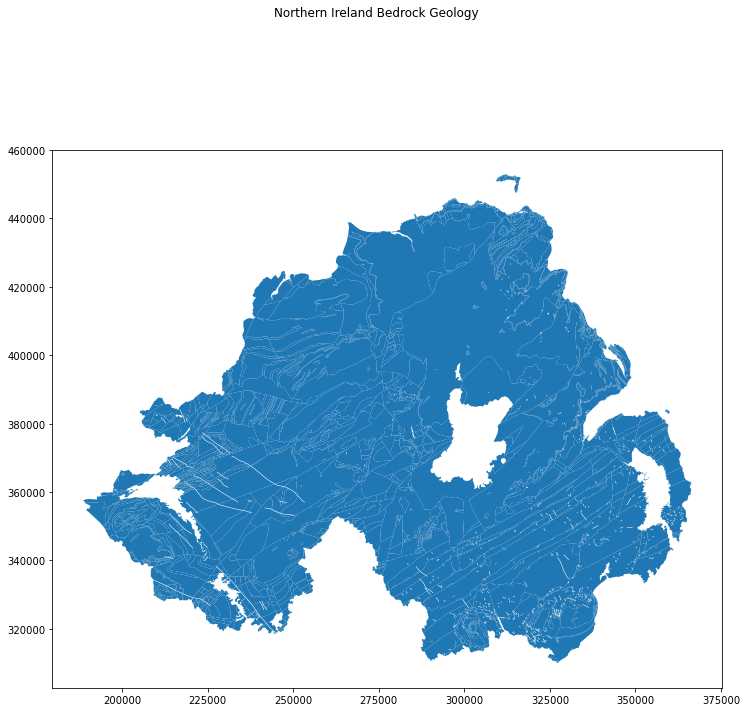

In [5]:
f, ax = plt.subplots(1, figsize=(12, 12))
ax = bedrocks.plot(axes=ax)
f.suptitle('Northern Ireland Bedrock Geology')
plt.show()

In [8]:
bedrocks = sf.Reader('data_files/bedrocks.shp')

In [10]:
with sf.Reader('data_files/bedrocks.shp') as shp:
    print(shp)

shapefile Reader
    2263 shapes (type 'POLYGON')
    2263 records (12 fields)


In [12]:
bedrocks.shapeType #Reading Shapefile Meta-Data, POLYGON = 5, https://pypi.org/project/pyshp/#reading-shapefiles

5

In [15]:
bedrocks.shapeType == sf.POLYGON #compare types more intuitively

True

In [17]:
bedrocks.shapeTypeName == 'POLYGON' #the name of the shape type as a string

True

In [18]:
len(bedrocks) #number of features

2263

In [21]:
bedrocks.bbox #bounding box area the shapefile covers

[188518.14839715767, 309938.890986756, 366414.3369967972, 452887.647]

In [24]:
shapes = bedrocks.shapes() #get a list of the shapefile's geometry by calling the shapes() method

In [25]:
fields = bedrocks.fields #get a list of the fields for the bedrocks, call the "fields" attribute

In [26]:
records = bedrocks.records() #get a list of the shapefile's records by calling the records() method

In [28]:
rec = bedrocks.record(3)

In [29]:
rec[1:3]

['TPR', 'RHYO']